<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/cv2_freecode/section1/%231Reading%26Draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Images

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cat = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/cat.jpg";

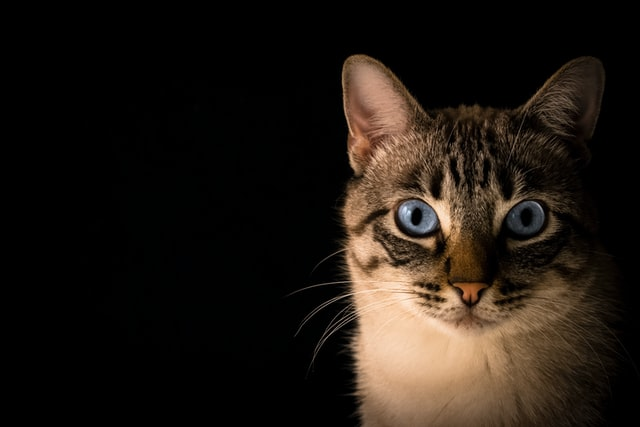

In [4]:
i_cat=cv.imread(cat) 
cv2_imshow(i_cat)
print(i_cat.shape)
print("Type of image = " , type(i_cat) )

In open cv image mode are in **BGR**

### Large Image

In [5]:
cat_large ="/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/cat_large.jpg"

(427, 640, 3)
Type of image =  <class 'numpy.ndarray'>


In [6]:
il_cat = cv.imread(cat_large)
# cv2_imshow(il_cat)
print(il_cat.shape)

(1600, 2400, 3)


# Reading Videos

In [7]:
dog = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Videos/dog.mp4"

In [8]:
capture = cv.VideoCapture(dog)

In [9]:
# # Reading video frame by frame using while loop 
# while True:
#   isTrue,frame = capture.read()
#   # isTrue is Boolean / frame  is return type
#   # To Display a video
#   cv2_imshow(frame)
#   # if cv.waitkey(20) & OxFF==ord('d'):
#     # break
# capture.release()
# cv.destroyAllWindows()   

# Rescale

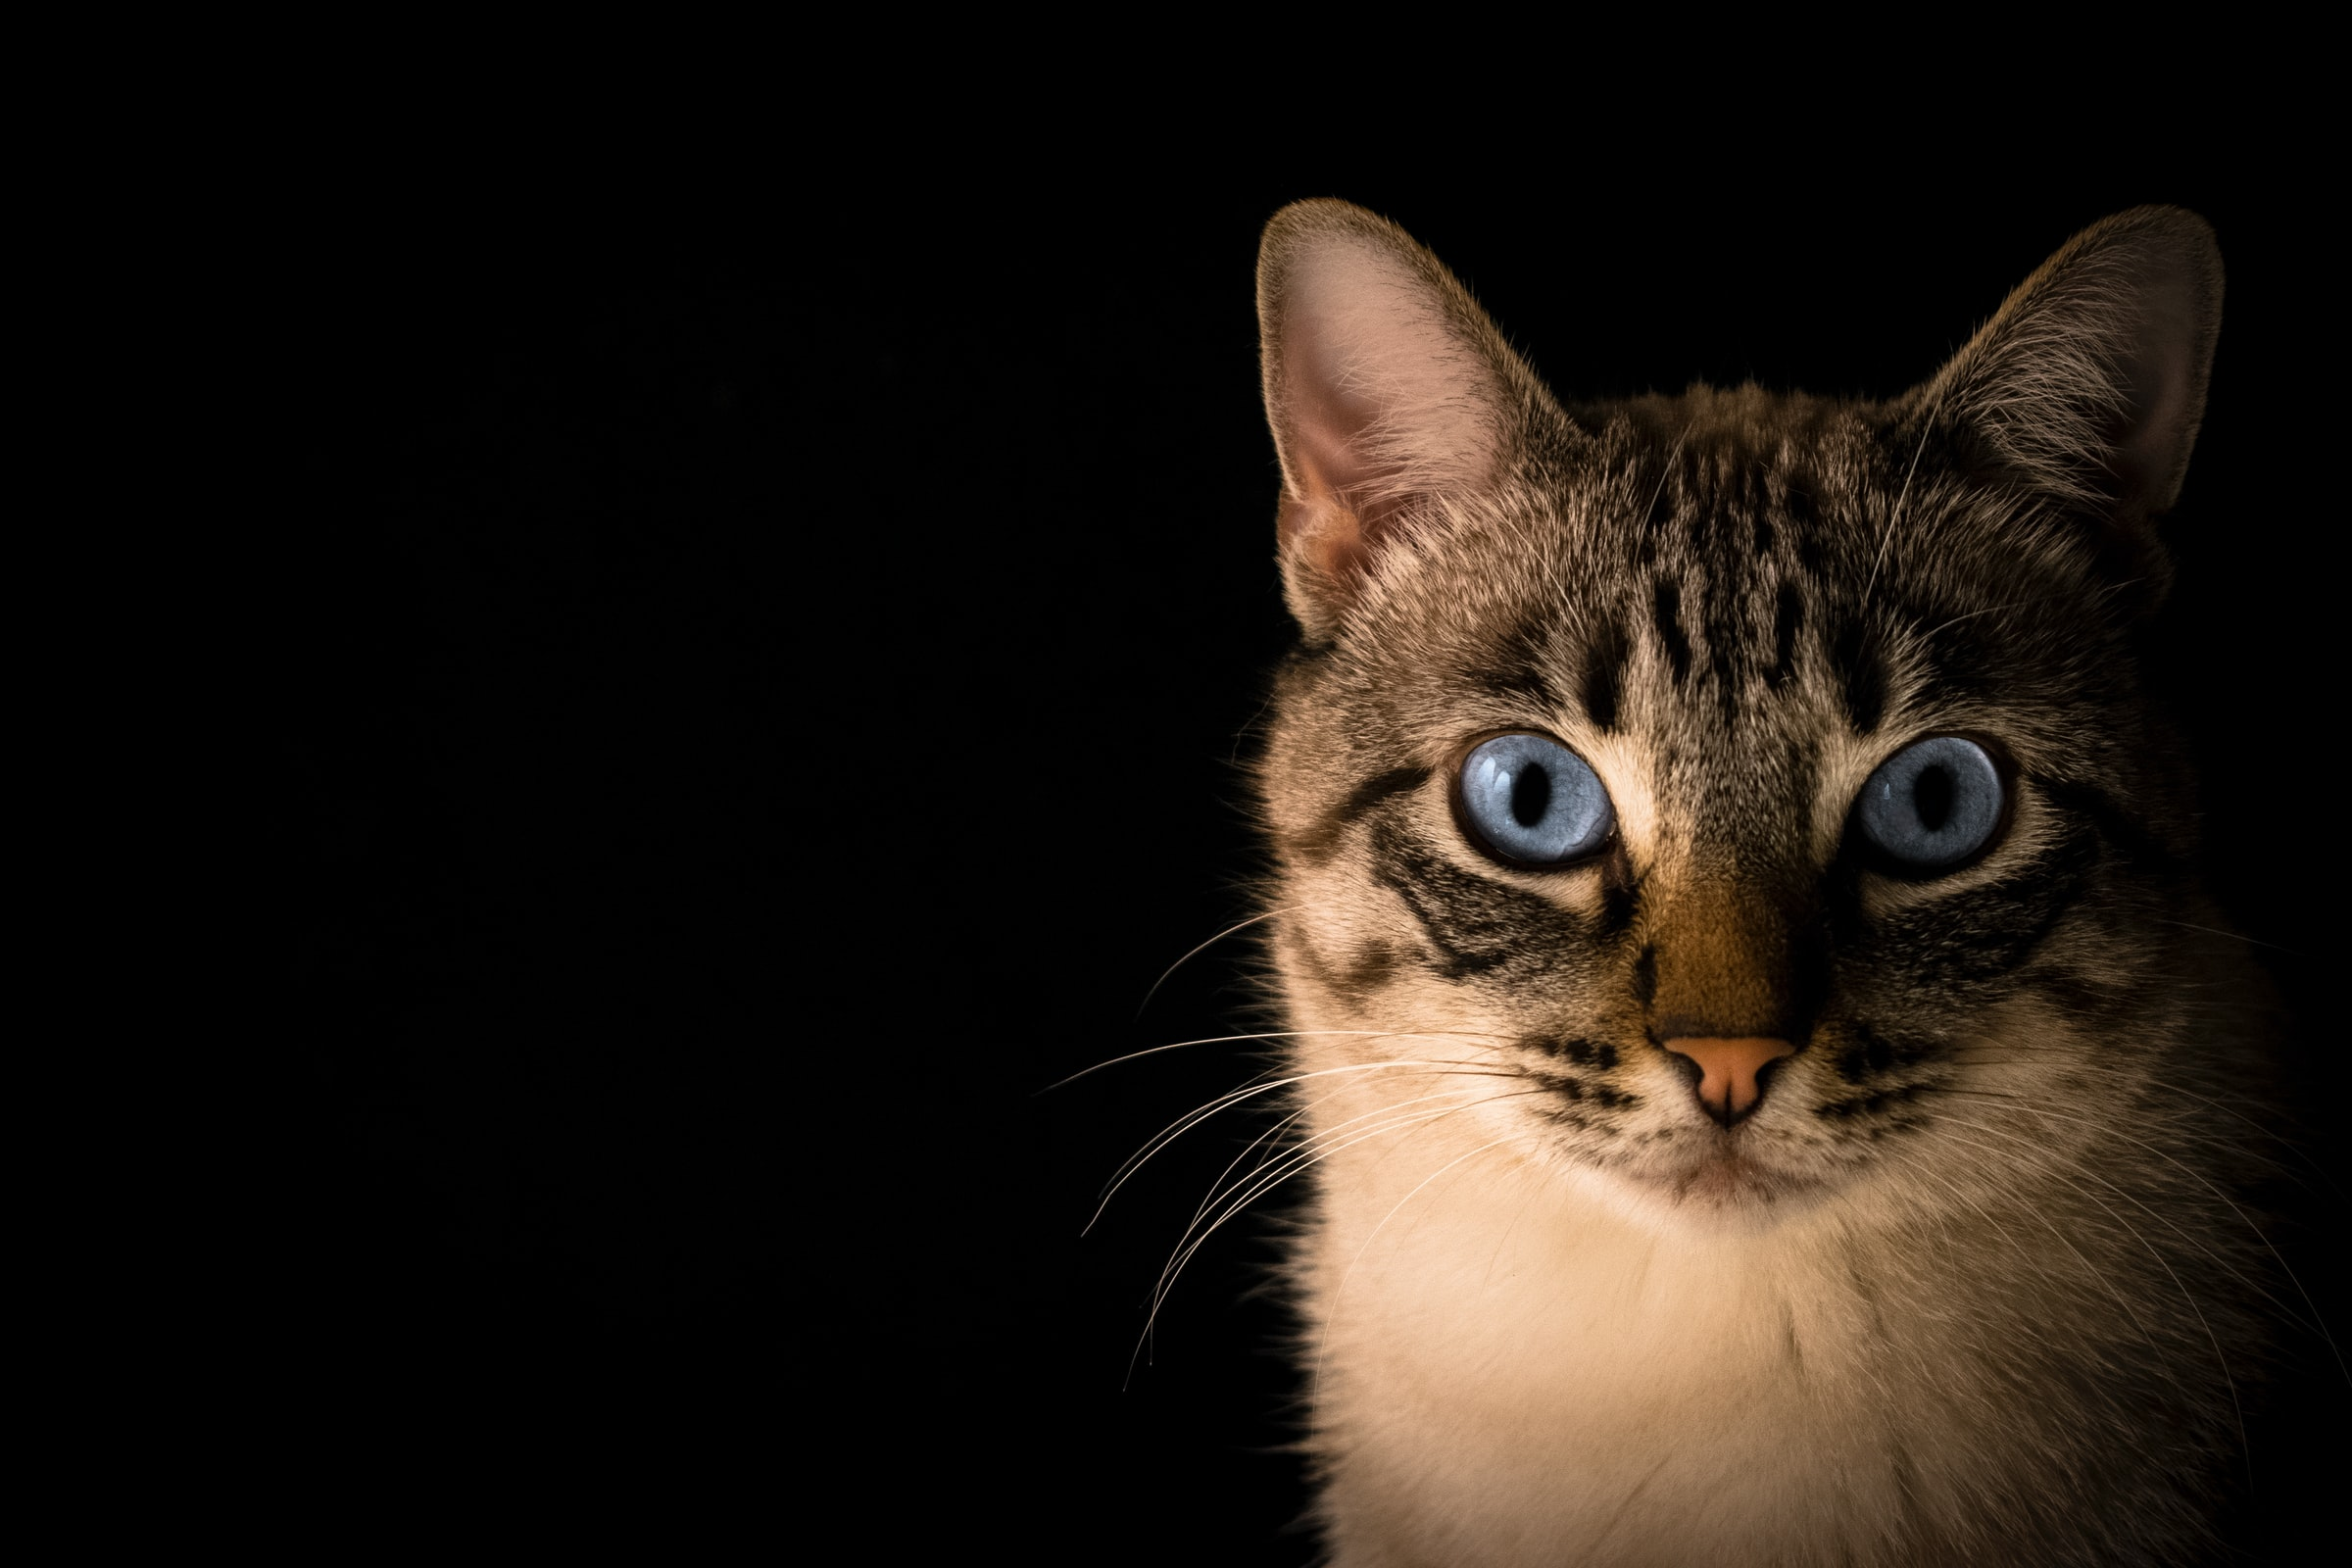

In [10]:
import cv2 as cv
cv2_imshow(il_cat) ;

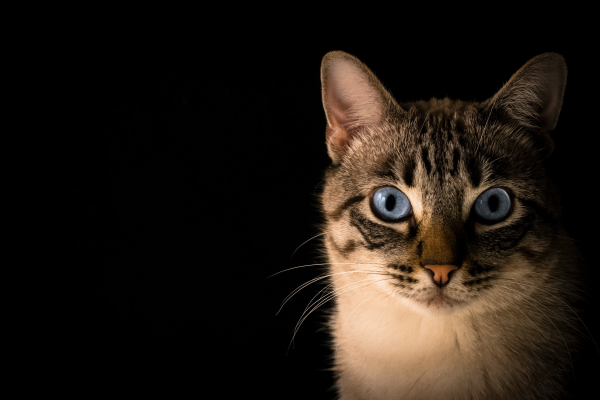

(400, 600, 3)

In [11]:
# function for rescale the image 
def rescaleFrame(frame , scale = 0.25):
  #  this is for all Images, Videos  and Live Videos
  width = int(frame.shape[1]*scale)
  height = int(frame.shape[0]*scale)
  dimension = (width,height)

  return cv.resize(frame ,dimension, interpolation=cv.INTER_AREA)

il_rcat = rescaleFrame(il_cat)
cv2_imshow(il_rcat)
display(il_rcat.shape)

In [12]:
#  Thier is more way to resize and rescale but this is only for video using capture 
def chnageres(width ,height):
  #  only work for Live Video , this not gone a work standalone video. 
  capture.set(3,width) # 3 is refrences for width and 4 is for height and 10 is brightness 
  capture.set(4,heigth)


# Draw On Images

In [13]:
import numpy as np 
blank = np.zeros((500,500,3) , dtype = "uint8")
# // uint8 is basically a image
type(blank)

numpy.ndarray

In [14]:
# cat = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/cat.jpg";
# i_cat=cv.imread(cat) 
# cv2_imshow(i_cat)
# print(i_cat.shape)
# print("Type of image = " , type(i_cat) )
# already done above

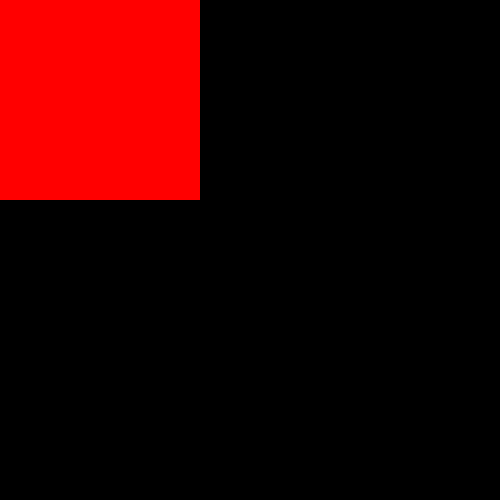

In [15]:
# Paint the image a certain column 
blank[0:200 , 0:200 , : ] = [0,0,255]
cv2_imshow(blank)

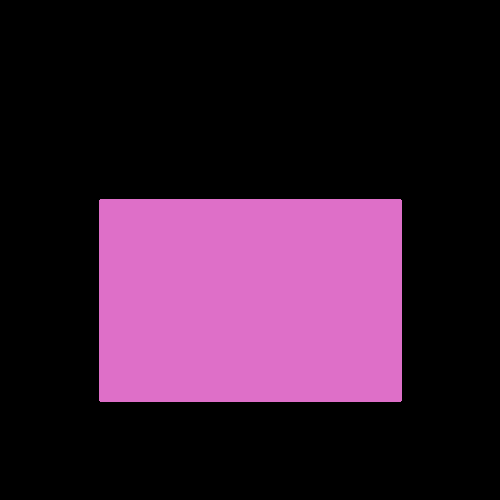

In [16]:
# Draw Rectangle 
# cv.rectangle(image , pt1 , pt2 , color , thickness=None , lineType=None , shift=None)
blank = np.zeros((500,500,3) , dtype = "uint8")
cv.rectangle(blank,(100,200),(400,400) , (200,111,222) , thickness = 2)
#  if you fill this in color
cv.rectangle(blank , (100,200), (400,400) , (200,111,222) , thickness = cv.FILLED)#  OR thickness= -1 its same as cv.FILLED
cv2_imshow(blank) 


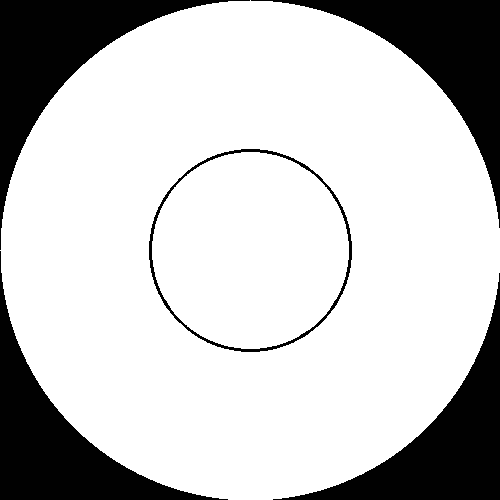

In [17]:
# Draw circle 
blank = np.ones((500,500,3) , dtype = "uint8")
# cv.circle(img , center, radius , color , thicknesss = None , lineType = None, shift=None)
cv.circle(blank , (250,250) , 250 , (255,255,255) , thickness = -1)
cv.circle(blank , (250,250) , 100 , (0,0,0) , thickness = 2)
cv2_imshow(blank)

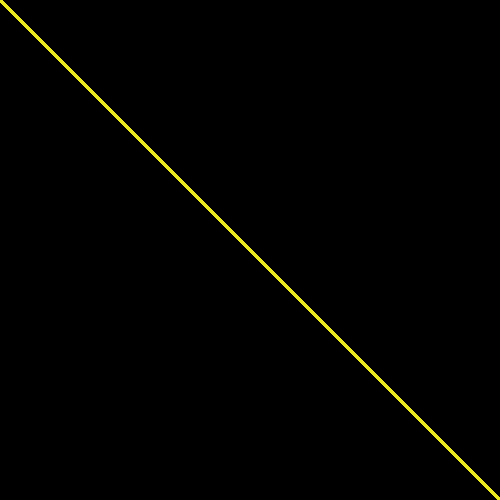

In [18]:
# Draw a line 
blank = np.zeros((500,500,3) , dtype = "uint8")
#  cv.line(image , pt1 , pt2 , color , thickness=None , lineType=None , shift=None)
cv.line(blank, (0,0) ,(500,500) , (32,234,234) , thickness = 2 )
cv2_imshow(blank)

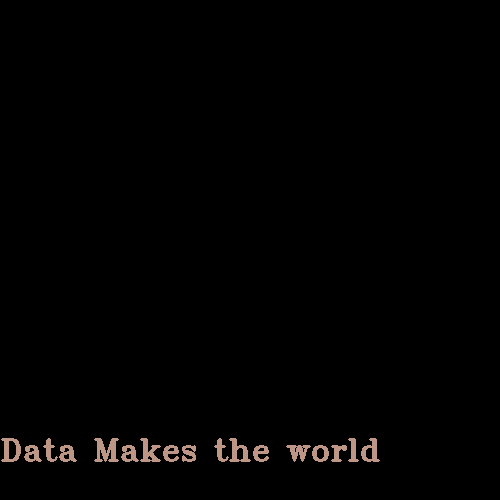

In [19]:
# Write Text
# cv.putText(img , txt , orgin , fontFace , fontScale , color , thick , lineType ,  bottomLeftOrigin=None )
blank = np.zeros((500,500,3) , dtype = "uint8")
cv.putText(blank , 'Data Makes the world' , (0,460) , cv.FONT_HERSHEY_TRIPLEX , 1.0 , (134,150,189) , 2)
cv2_imshow(blank)

# 5 Essential Functions

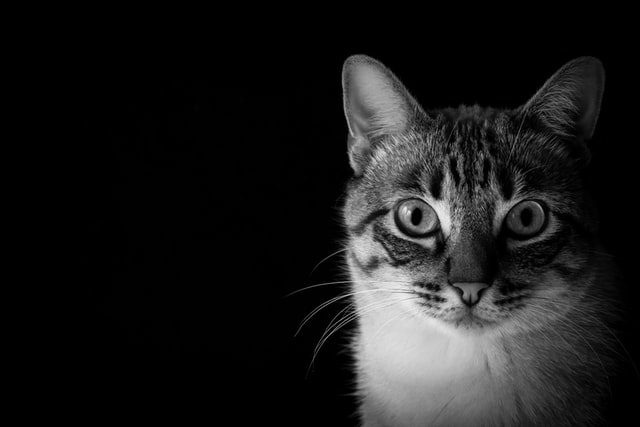

In [20]:
# Converting Image into grayscale 
samcat = cv.imread(cat)
graycat = cv.cvtColor(samcat , cv.COLOR_BGR2GRAY)
cv2_imshow(graycat)



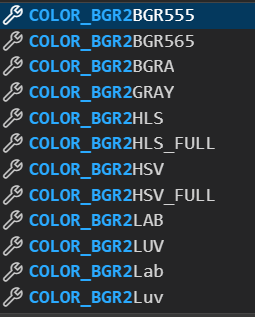

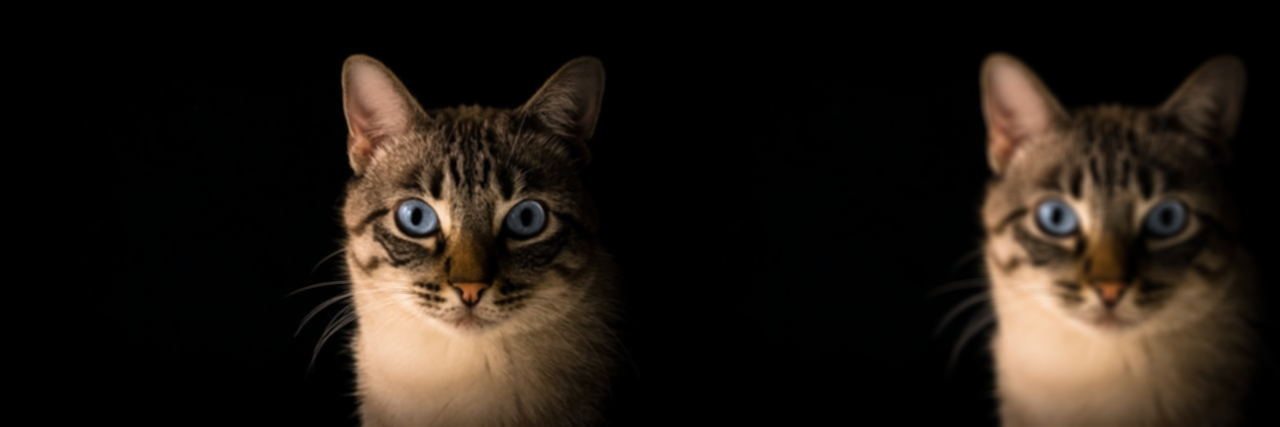

In [21]:
# Blur
samcat = cv.imread(cat)
#  cv.gaussianBlur(src , kernelSize , sigmaX , dst=None , sigmaY = None , borderType=None)
Gblur3 = cv.GaussianBlur(samcat , (3,3) , cv.BORDER_DEFAULT)
# To increase the blurness of image wecan increase the kernel size
Gblur9 = cv.GaussianBlur(samcat , (9,9) , cv.BORDER_DEFAULT)
# samcat the actual not be hindered
cv2_imshow(np.hstack((Gblur3, Gblur9)))

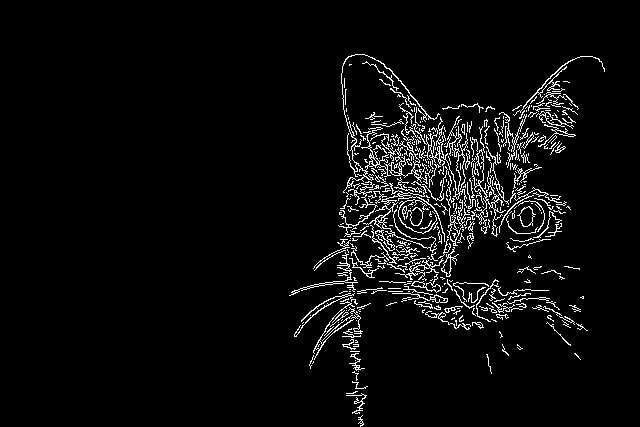

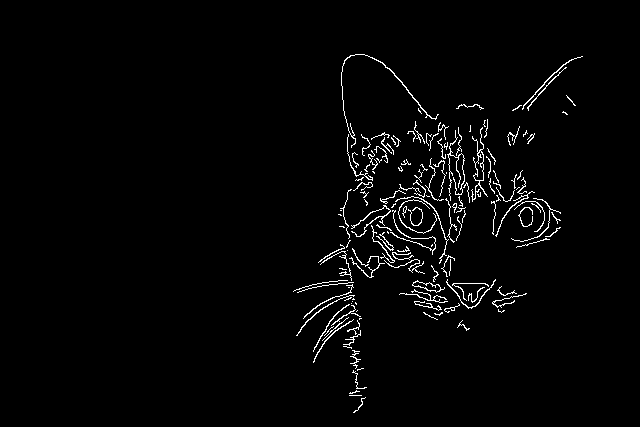

In [22]:
# Canny edge 
edgcat = cv.imread(cat)
cancat = cv.Canny(edgcat , 100,200 )
blurcancat = cv.Canny(Gblur3 , 100, 200)
#  100 -> minimum  value of canny
#  200 -> maximum value of canny 
cv2_imshow(cancat)
cv2_imshow(blurcancat)
# by bluring we can reduce edges

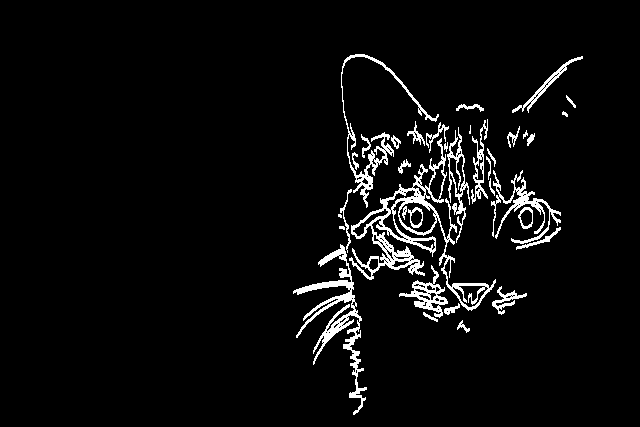

In [32]:
# Dilate 
dilated = cv.dilate(blurcancat, (5,5) , iterations = 2)
cv2_imshow(dilated)
# the edgesbecome more sharpen

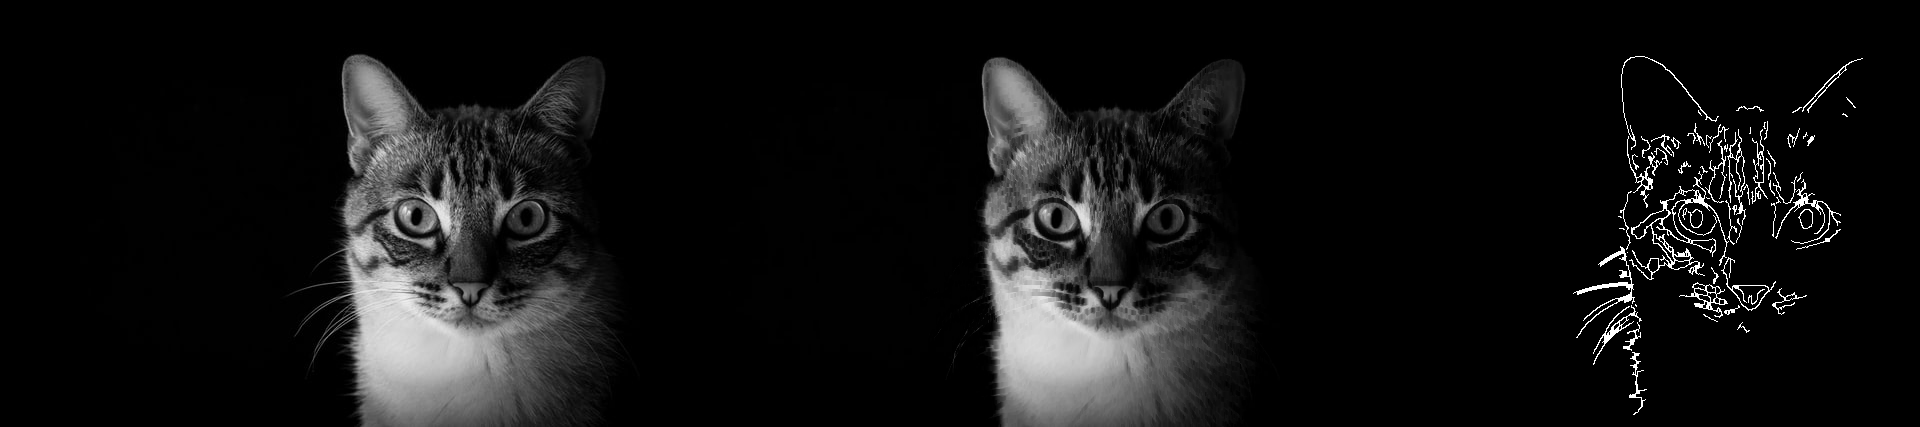

In [33]:
"""  Eroding ->
Erosion of image means to shrink the image. If any of the pixels in a kernel is 0, 
then all the pixels in the kernel are set to 0. 
One condition before applying an erosion function on image is that the image should 
be a grayscale image.
"""
# syntax->  cv2.erode(src , kernel , iteration) 
erode1 = cv.erode(graycat , (9,9) , iterations = 3 ) 
erode2 = cv.erode(dilated , (5,5) ,  iterations =  2)
cv2_imshow(np.hstack((graycat ,erode1 ,erode2)))

(427, 640, 3)


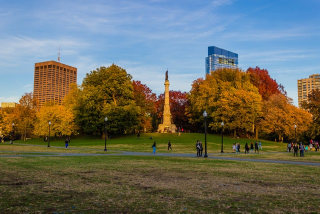

In [36]:
#  RESIZE
"""
 resizeed = v.resize(img , (dimension) , interpolation = cv.INTER_AREA) 
  In interpolation if you shrinking the cv.INTER_AREA is good 
  ""   ""      if you expand/ inlarge image then cv.INTER_CUBIC (slow process), cv.INTER_LINEAR (fast)
"""
park = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/park.jpg" 
ipark = cv.imread(park)
print(ipark.shape)
resize=cv.resize(ipark ,None ,fx = 0.5 , fy = 0.5,  interpolation  = cv.INTER_AREA )
#  above we shrink the image that why we use cv.INTER_AREA
cv2_imshow(resize)

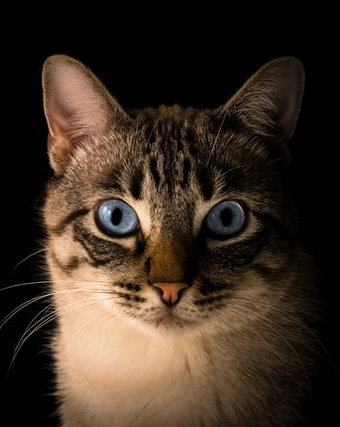

In [43]:
# CROP
i_cat.shape
cropped = i_cat[0:427 , 320:640 ]
cv2_imshow(cropped)

-------------------END________________

NEXT TOPIC IS :

**Image Transformation**